In [1]:
import sqdtoolz as sqdt
import numpy as np
import os
import pandas as pd 
from matplotlib import pyplot as plt
from time import sleep
from sqdtoolz.Utilities.DataFitting import* 
from sqdtoolz.Utilities.DataFitting import DFitNotchResonance
from sqdtoolz.Utilities.FileIO import FileIOReader
from sqdtoolz.Drivers.ACQ_RS_FSV_SAZ import RS_FSV_SAZ
# from resonator_tools import circuit
import datetime

In [2]:
lab = sqdt.Laboratory(instr_config_file = "ACQ_saz_Rack.yaml", save_dir = "z:\\Data\\Double-Upconversion_NEW_Oscilloscope_Driver_Test\\", using_VS_Code=True)
# dsc.close_all()
saz= RS_FSV_SAZ('saz', address='TCPIP::192.168.1.150::INSTR')
sqdt
# lab.load_instrument('dsc')
# sqdt.HAL.ACQdsc('dsc', lab, ['dsc','CH1'])


<module 'sqdtoolz' from 'c:\\users\\experiment\\documents\\sqdtoolz\\sqdtoolz\\__init__.py'>

In [27]:
saz.GTR#go to remote control
saz.SystemDisplayUpdate='on'#turn on the local monitor
saz.FormatData='real,32'#the data format of the wave form
saz.SenseAdjustAll='all'# auoto set:auto all



In [28]:
saz.SenseRoscillatorSource='external'#or internal
saz.SenseRoscillatorExternalFrequency=10e6#10MHz

In [29]:
saz.SenseRoscillatorExternalFrequency

10000000.0

In [8]:
saz.SenseFrequencyCenter=6e9#center frequency
saz.SenseFrequencySpan=2e9#frequency span

In [6]:
saz.SenseFrequencySpanFull='full'


In [65]:
saz.SenseFrequencyStart=1e9
saz.SenseFrequencyStop=9e9

(1, 691)


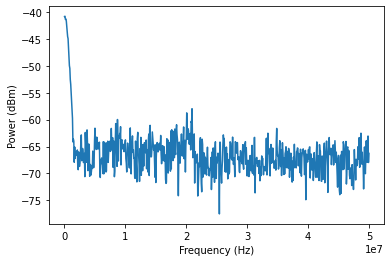

In [3]:
saz.wfm_plot()
path="z:\\Data\\Double-Upconversion_NEW_Oscilloscope_Driver_Test\\addd.h5"
saz.data2hdf5(path)

In [69]:
type(saz.wfm_data)
np.savetxt('Z:\\PEOPLE\David\\data_dupc\\2nd_stage_5.61057GHZ_FREQ_1-9G_run2.out', saz.X, delimiter=',')
np.savetxt('Z:\\PEOPLE\David\\data_dupc\\2nd_stage_5.61057GHZ_POWER_ZOOM_1-9G_run2.out', saz.Y, delimiter=',')

In [ ]:
saz.Y

In [4]:
wf3_channel_a._instr_mw_output.pll_status()

'ON'

In [72]:

lab.load_instrument('MWS_Windfreak_3')
wf3_channel_a = sqdt.GENmwSource('WINDFREAK_CH_A', lab, 'MWS_Windfreak_3', 'RFoutA') #HAL
wf3_channel_b = sqdt.GENmwSource('WINDFREAK_CH_B', lab, 'MWS_Windfreak_3', 'RFoutB') #HAL


lab.load_instrument('src_res')
src_res=sqdt.GENmwSource('src_res', lab, 'src_res', 'RFOUT')
#Windfreak 3 channels

src_res.Power=-10
src_res.Frequency=500e6
src_res.Output=True
src_res.Mode='Continuous'

#channel A
wf3_channel_a.Power = 16 #dBm
wf3_channel_a.Output = True
wf3_channel_a.Frequency = 3.4e9 #LO1 3.4e9
wf3_channel_a.Mode = 'Continuous'

#channel B
wf3_channel_b.Power = 16 #dBm
wf3_channel_b.Output = True
wf3_channel_b.Frequency =  8.51057e9
wf3_channel_b.Mode = 'Continuous'

In [73]:
5.61057+2.9 + 2.9

11.41057